In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [33]:
physical_device=tf.config.experimental.list_physical_devices('GPU')
print("No. of GPUs Available: ",len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

No. of GPUs Available:  1


In [34]:
os.chdir('D:/Dataset COVID-19 Augmented')
if os.path.isdir('D:/Dataset COVID-19 Augmented/COVID-19') is False:
    os.makedirs('D:/Dataset COVID-19 Augmented/train/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/train/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/noncovid')
    
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/noncovid')
os.chdir('../../')

In [35]:
train_path = 'D:/Dataset COVID-19 Augmented/train'
valid_path = 'D:/Dataset COVID-19 Augmented/valid'
test_path = 'D:/Dataset COVID-19 Augmented/test'

In [36]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [37]:
train_batches

In [38]:
imgs, labels = next(train_batches)

In [39]:
imgs1,labels1=next(test_batches)

In [40]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

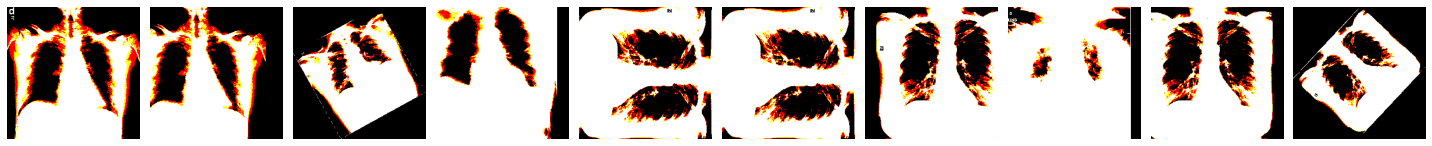

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [41]:
plotImages(imgs1)
print(labels1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

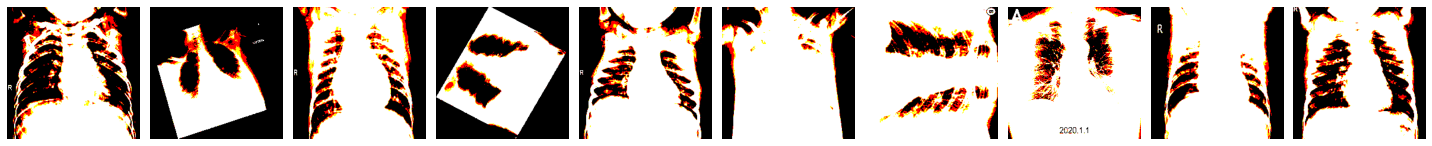

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [42]:
plotImages(imgs)
print(labels)

In [43]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [45]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=1)

Epoch 1/5
140/140 [==============================] - 39s 280ms/step - loss: 3.7572 - accuracy: 0.9379 - val_loss: 1.2532 - val_accuracy: 0.9600
Epoch 2/5
140/140 [==============================] - 16s 118ms/step - loss: 0.5479 - accuracy: 0.9786 - val_loss: 0.0130 - val_accuracy: 0.9950
Epoch 3/5
140/140 [==============================] - 16s 115ms/step - loss: 0.5177 - accuracy: 0.9779 - val_loss: 0.1619 - val_accuracy: 0.9950
Epoch 4/5
140/140 [==============================] - 16s 116ms/step - loss: 0.1093 - accuracy: 0.9929 - val_loss: 0.2872 - val_accuracy: 0.9850
Epoch 5/5
140/140 [==============================] - 16s 115ms/step - loss: 0.0976 - accuracy: 0.9943 - val_loss: 0.6517 - val_accuracy: 0.9750


In [47]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [48]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [49]:
predictions.shape

(200, 2)

In [50]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

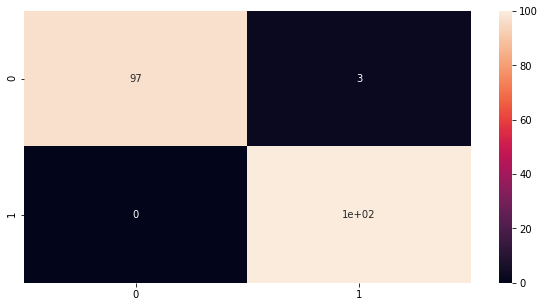

In [51]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot=True)
plt.show()

In [52]:
import os.path
if os.path.isfile('D:/datasetcollection/models/cnn.h5') is False:
    model.save('D:/datasetcollection/cnn.h5')

In [53]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/cnn.h5')

In [54]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

<class 'PIL.Image.Image'>


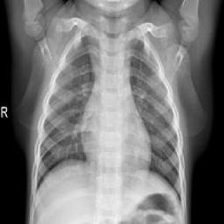

In [55]:
from PIL import Image
im = keras.preprocessing.image.load_img("D:/Dataset COVID-19 Augmented/pred/non,jpg.jpg", target_size=(224,224)) 
print(type(im))
display(im)

In [56]:
doc = keras.preprocessing.image.img_to_array(im) # -> numpy array
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [57]:
doc = np.expand_dims(doc, axis=0)
print(type(doc), doc.shape)

<class 'numpy.ndarray'> (1, 224, 224, 3)


In [58]:
predictions = new_model.predict(x=doc, steps=len(test_batches), verbose=0)

In [59]:
predictions

array([[0.95544386, 0.04455614]], dtype=float32)

In [60]:
pred=np.round(predictions)

In [61]:
train_batches[0][0].shape

(10, 224, 224, 3)

In [62]:
pred

array([[1., 0.]], dtype=float32)